Extracted file -> "documents/output/generated_graphmtx_correl_ewm_vol.csv.gexf"
Extracted file -> "documents/output/maximal_spanning_tree_graphmtx_correl_ewm_vol.csv.gexf"
-------------
Extracted file -> "documents/output/generated_graphmtx_correl_log_ret.csv.gexf"
Extracted file -> "documents/output/maximal_spanning_tree_graphmtx_correl_log_ret.csv.gexf"
-------------
----------------------------------------------
2 csv files are processed


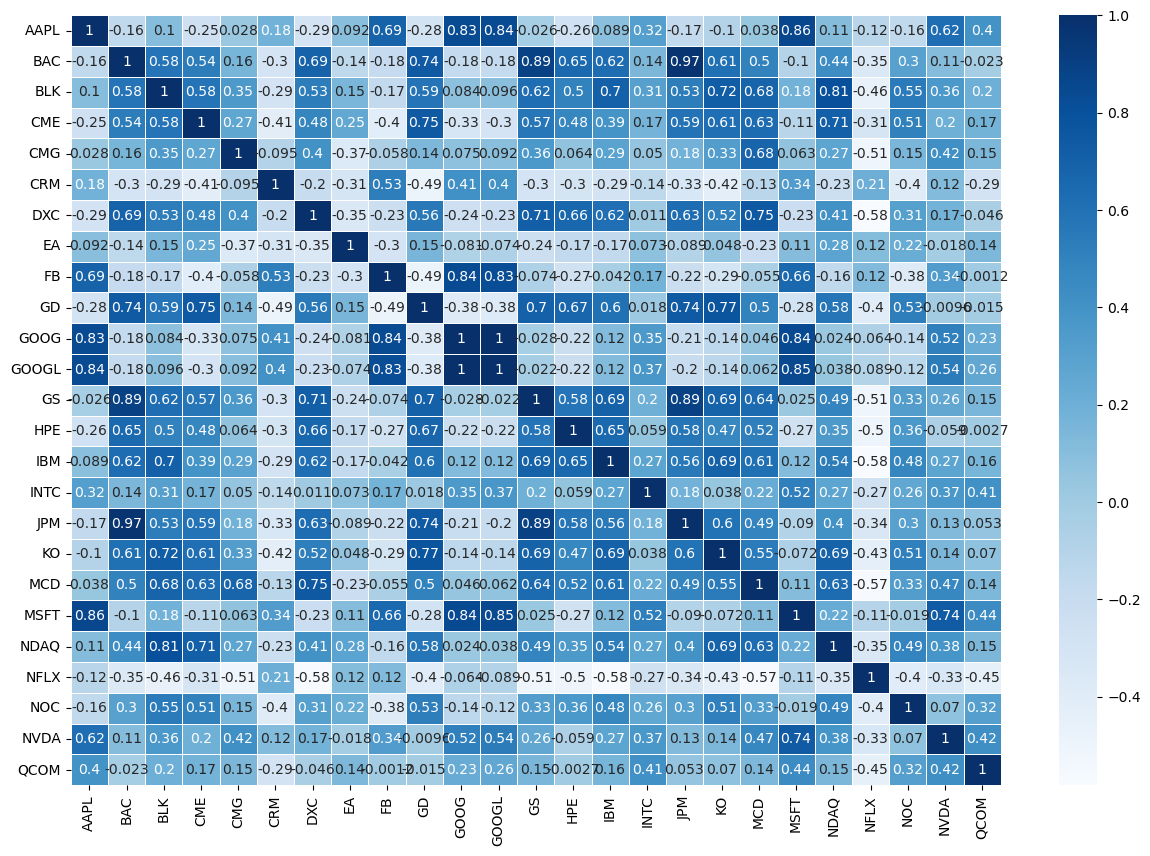

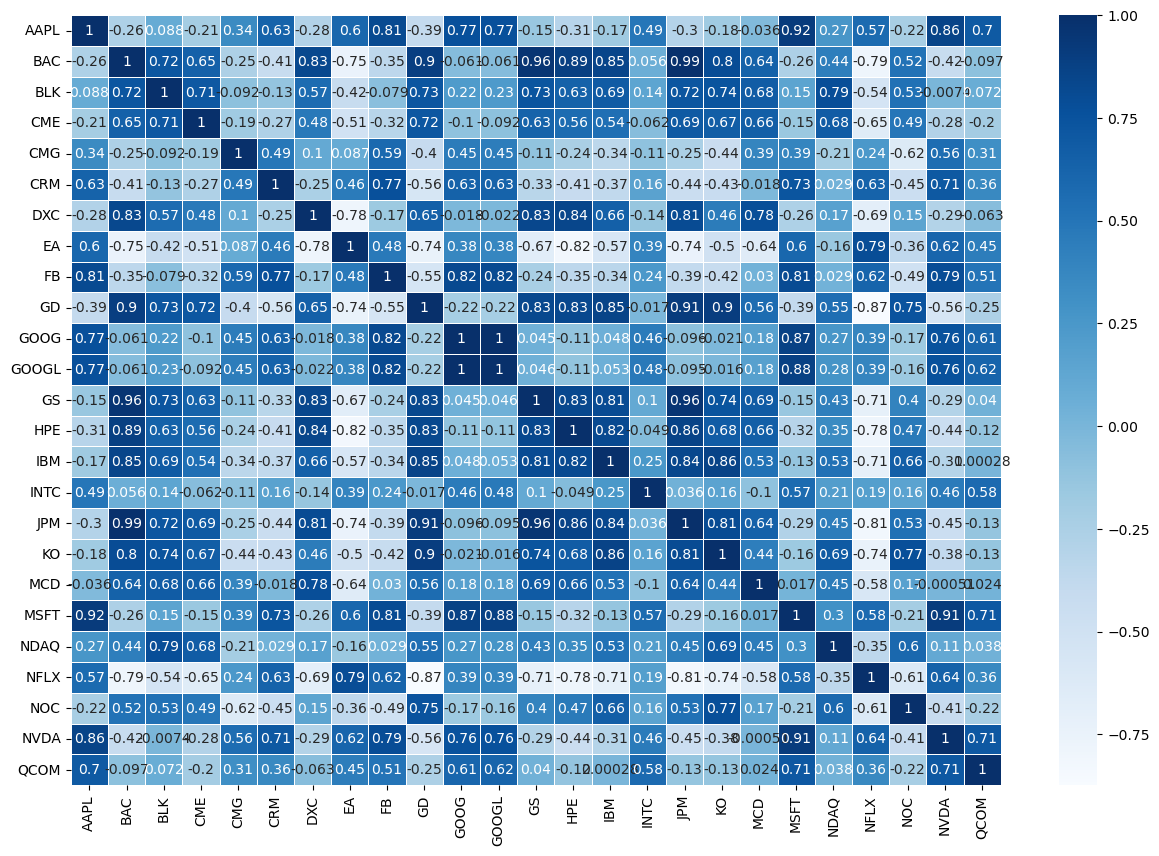

In [124]:
%run model/Util.ipynb
%run model/Constants.ipynb
%run model/Graph.ipynb
%run model/MaximalSpanningTreeGraph.ipynb

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

if __name__ == '__main__': 
    # Check for files location
    flI = 0
    for path in os.scandir(constants['pathInput']):
        if path.is_file():
            flI = flI + 1

            # Load the dataset from a csv file
            df = pd.read_csv("{}{}".format(constants['pathInput'], path.name))
            
            # Generate heatmap on loaded dataframe
            plt.figure(figsize = (15, 10))
            sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = 'Blues')
                       
            # Generate graph from csv file and export as GEXF file
            generatedGraph = Graph()
            generatedGraph = generatedGraph.generateGraph(df, path)
            writeGEXFFile(path, generatedGraph, constants, 'generated_graph')
            # print(generatedGraph)            
            print('Extracted file -> "{}generated_graph{}.gexf"'.format(constants['pathOutput'], path.name))
            
            # Generate Minimum Spanning Tree graph from csv file and export as GEXF file
            maximalSpanningTreeGraph = MaximalSpanningTreeGraph()
            maximalSpanningTreeGraph = maximalSpanningTreeGraph.KruskalMST(generatedGraph)
            writeGEXFFile(path, maximalSpanningTreeGraph, constants, 'maximal_spanning_tree_graph')
            # print(minimumSpanningTreeGraph)            
            print('Extracted file -> "{}maximal_spanning_tree_graph{}.gexf"'.format(constants['pathOutput'], path.name))
            print('-------------')
    
    print('----------------------------------------------')
    print('{} csv files are processed'.format(flI))
    